# Part I - (Ford GoBike System)
## by Lawal Salim

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area
The main aim of exploring the dataset is to gain insight on the cause of the delay in trip duration. The variables to take note in this dataset include the Passenger Gender, Age range, and possibly the type of user that has made use of the bike over a period of time.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

The properties of the dataset and the following columns:
* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User type
* Member Birth Year
* Member Gender and 
* Bike Share Trip


In [2]:
#create dataframe and load csv file
df = pd.read_csv('C:\\Users\\Salim\\Desktop\\ALX-T\\fordgobike-tripdata.csv', parse_dates=['member_birth_year'])

### Dataset structure

> The Data set has a total of 16 columns and a total of 183412 entries 

### Main feature(s) of interest in the dataset
> The main features to take note of in this dataset include:
> 1. The Start and End station names: This would give an idea on which of the stations the bikers use the most for their rides.
> 2. The gender: which gives us insight into which gender makes use of the bikes the most
> 3. The member birth year: which provides more information on the age range that dominates the use of the bike

### Main features (supporting features)

> The station names, the user types and the member birth year and the gender

In [3]:
#the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  object        
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [4]:
#structure of data set continued 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000


In [5]:
df.shape

(183412, 16)

In [6]:
#more on checking the structure of the dataset
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaT,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996-01-01,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984-01-01,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990-01-01,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988-01-01,Male,No


In [7]:
#changing the start and endtime to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['member_birth_year'] = pd.to_datetime(df['member_birth_year'])

In [8]:
#changing all bike_share to boolean
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [10]:
#finding the number of unique bikes
df.bike_id.nunique()

4646

In [11]:
#checking for null values in bike id column
df.bike_id.isna().sum()

0

In [12]:
#checking for null values in the membership birth year
df.member_birth_year.isna().sum()

8265

In [13]:
#checking for null values in the member gender 
df.member_gender.isna().sum()

8265

In [14]:
def drop_column_row(df, column_row, axis):
    df.drop(column_row, axis=axis, inplace=True)

In [15]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [16]:
missing_member_birth_year = df[df.member_birth_year.isnull()].index

drop_column_row(df, missing_member_birth_year, 0)

In [17]:
df['member_birth_year']

0        1984-01-01
2        1972-01-01
3        1989-01-01
4        1974-01-01
5        1959-01-01
            ...    
183407   1996-01-01
183408   1984-01-01
183409   1990-01-01
183410   1988-01-01
183411   1989-01-01
Name: member_birth_year, Length: 175147, dtype: datetime64[ns]

In [18]:
missing_member_gender = df[df.member_gender.isnull()].index

drop_column_row(df, missing_member_gender, 0)

In [19]:
# Convert given date to age
today = datetime.today()
df['member_birth_year'] = df['member_birth_year'].apply(lambda x: (today - x).days // 365)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  int64         
 12  user_type       

In [21]:
#check empty rows of the member_birth_year 
df['member_birth_year']

0         38
2         50
3         33
4         48
5         63
          ..
183407    26
183408    38
183409    32
183410    34
183411    33
Name: member_birth_year, Length: 175147, dtype: int64

In [22]:
df['Age'] = df['member_birth_year']

## Univariate Exploration

(0.0, 7000.0)

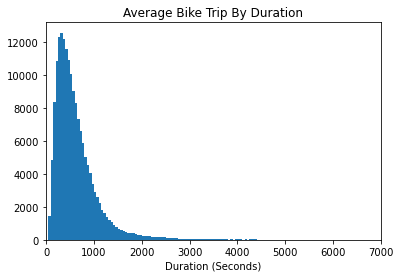

In [23]:
#Plotting the average trip duration as a main variable.
# considering the main variable to be the average trip, plotting the graph for visualisation
bins = np.arange(0, df['duration_sec'].max() + 80 , 50)
plt.hist(data = df , x = 'duration_sec' , bins = bins)
plt.title('Average Bike Trip By Duration')
plt.xlabel('Duration (Seconds)');plt.xlim(0,7000)

In [24]:
# Converting the seconds to minutes.
df['duration_in_min'] = df['duration_sec'] / 60

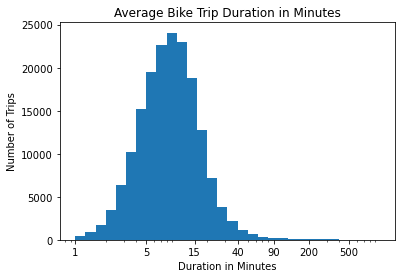

In [25]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 5, 15, 40, 90, 200, 500]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_in_min' , bins = bins);
plt.xscale('log');
plt.xlabel('Duration in Minutes');
plt.title('Average Bike Trip Duration in Minutes');
plt.ylabel('Number of Trips');plt.xticks(ticks,labels);

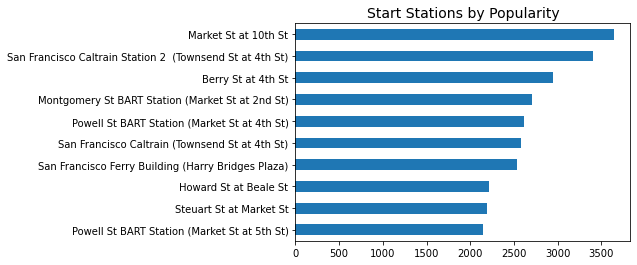

In [26]:
plt.title('Start Stations by Popularity', fontsize=14)
df.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

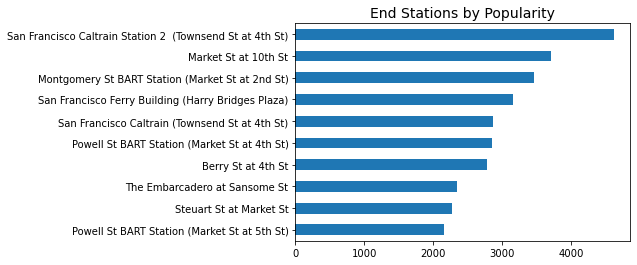

In [27]:
plt.title('End Stations by Popularity', fontsize=14)
df.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

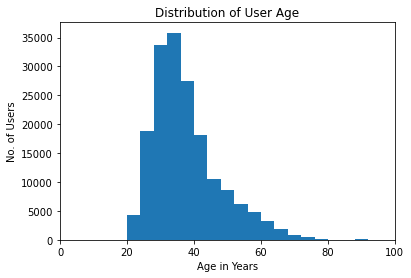

In [28]:
# The age distribution derived from member's birth year.
bin_size = 4
bins = np.arange(0, df['Age'].max()+bin_size, bin_size)
plt.hist(data = df.dropna(), x = 'Age', bins = bins)
plt.xlim(0,100)
plt.title('Distribution of User Age')
plt.xlabel('Age in Years')
plt.ylabel('No. of Users');

In [29]:
#checking the different types of users
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

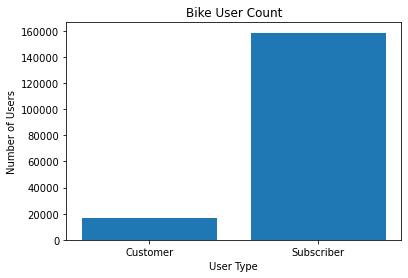

In [30]:
# The distrubtion of types of users.
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.gca().invert_xaxis()
plt.xlabel('User Type')
plt.title('Bike User Count')
plt.ylabel('Number of Users');

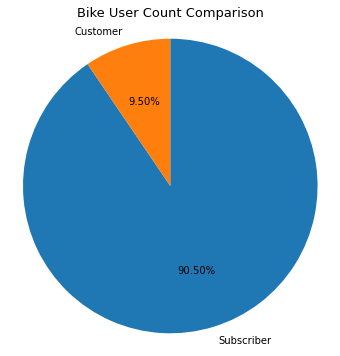

In [31]:
# User type by it's percentage

plt.figure(figsize=(9,6))
counts_sorted = df['user_type'].value_counts()
plt.pie(counts_sorted, labels = counts_sorted.index, startangle = 90,
        counterclock = False, autopct='%2.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=13);

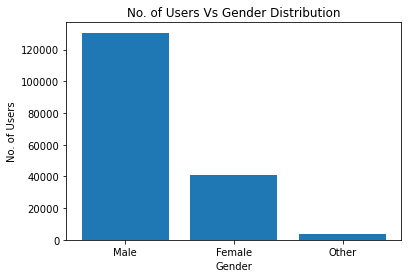

In [32]:
# The distrubtion to get the gender of users involved.
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts())
plt.xlabel('Gender')
plt.title('No. of Users Vs Gender Distribution')
plt.ylabel('No. of Users');

### Variable distribution

* The average bike trip by duration has its peak at a little above 12000 users while the trips majorly lasted in less than 1000 secs range

* The average number of trips per minute is between 5 and 15mins with the peak estimated to be around 13mins per trip

* The start station with the highest popularity is the Market St at 10th St while the end station with the highest popularity is   the San Franscisco Caltrain Station 2

* On the other hand, the start and end stations with least popularity is the Powell St BART Station for both

* Majority of the users are subscribers and a large percentage of them are Males

* Observation is that the majority of the bike users are within the age range of 20-40 years old and there is no user less than the age of 20years old.

### Operations performed on the data to 
* Tidiness,
* Form of data (data type)

> I observed some tidiness issues with the dataset, these include:

* data type issues for many of the columns; end, start time to datetime and age to int type.
* Converting the member birth year to age for easy analysis and dropping empty rows in that column
* Also, dropping the empty rows in the gender column

## Bivariate Exploration

<AxesSubplot:>

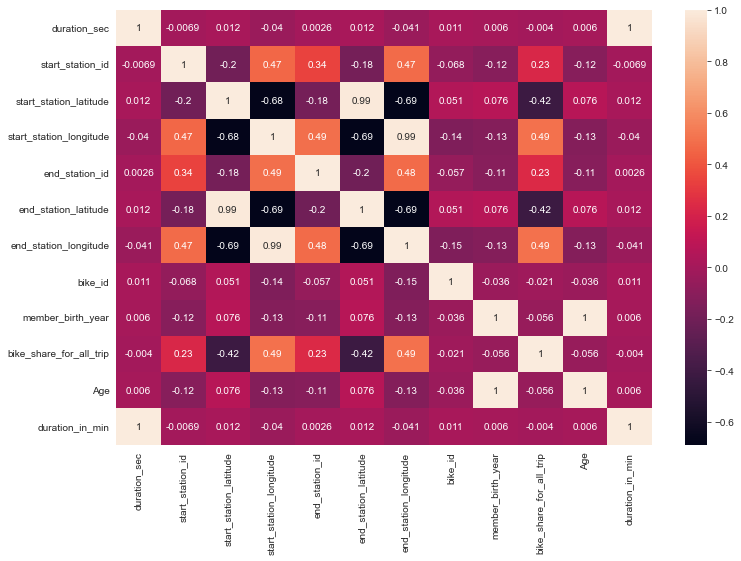

In [104]:
#checking the relationship between the variables to have idea which to compare for visualization
plt.figure(figsize = (12,8))
sb.heatmap(df.corr().T, annot = True)

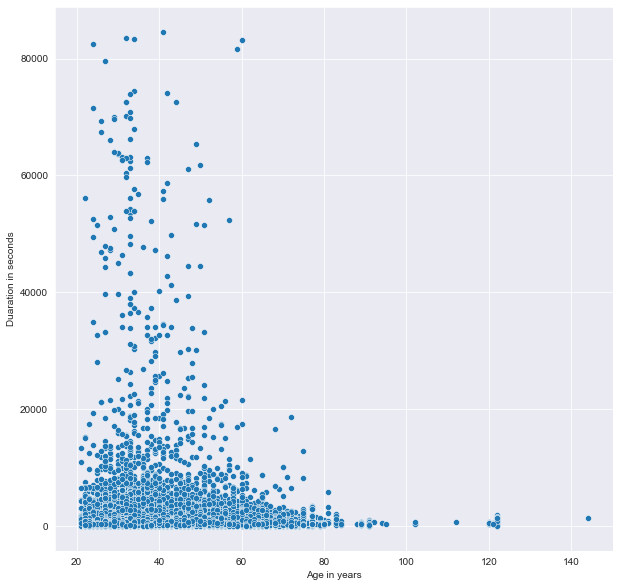

In [99]:
# Getting the impact of Age on the trip duration
sb.set_style("darkgrid")
plt.figure(figsize = (10,10))
pplot = sb.scatterplot(data = df, x = 'Age', y = 'duration_sec',
            sizes =(20,200));
pplot.set_xlabel('Age in years')
pplot.set_ylabel('Duaration in seconds');

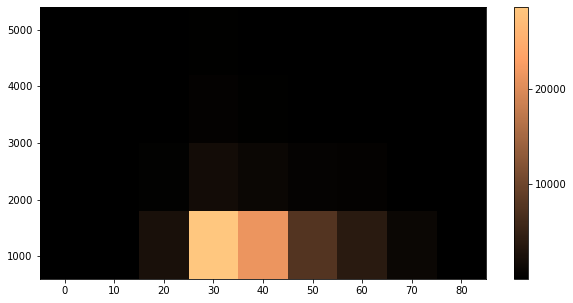

In [35]:
plt.figure(figsize=[10,5])
y_bins = np.arange(600, 6500+1, 1200)
x_bins = np.arange(-5, 85+1, 10)
plt.hist2d(df['Age'], df['duration_sec'],
           bins = [x_bins, y_bins],cmap='copper')
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);

In [36]:
df.start_station_id.nunique()

329

<AxesSubplot:xlabel='member_gender', ylabel='Age'>

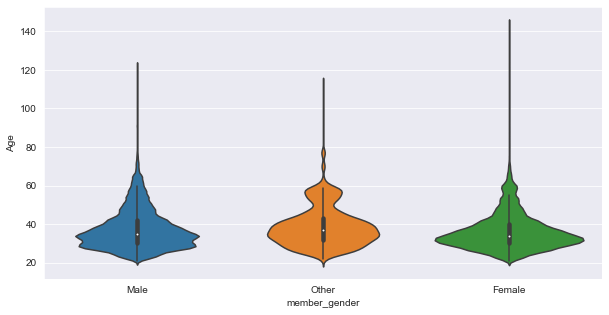

In [131]:
plt.figure(figsize = (10,5))
sb.violinplot(data = df, x = 'member_gender', y = 'Age')

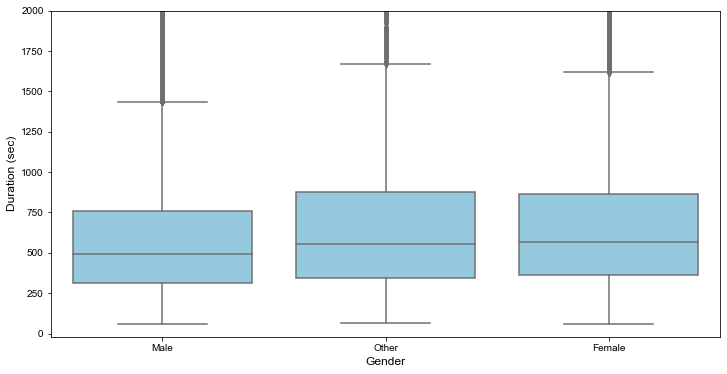

In [41]:
plt.figure(figsize = [12, 6])
vis_color = sb.color_palette()[9]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = 'skyblue')
plt.ylim([-20, 2000])
sb.set(style = 'darkgrid')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Duration (sec)', fontsize=12);

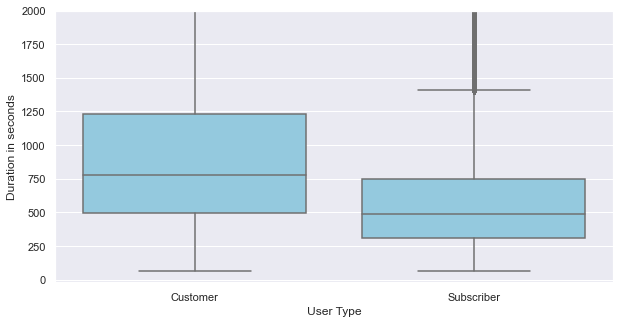

In [42]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[9]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = 'skyblue')
plt.ylim([-20, 2000])
sb.set(style = 'darkgrid')
plt.xlabel('User Type')
plt.ylabel('Duration in seconds');

### Observed relationships

* From the Scatter Plot, majority of trips are from users below the age of 80 and 6000 seconds duration therefore there is a need to look at the distrubtion within these values
* It can be seen from the scatterplot and heat map that the majority of users are between the age of 20-40 years old with high duartion of trips around the age of 30 years old.
* from the violinplot, it shows that we have a high number of older females taking the trip than male.

### Interesting relationships between the other features (not the main feature(s) of interest

> I observed that the Males have a higher number of trips, however, females have longer trip duration than males 

## Multivariate Exploration

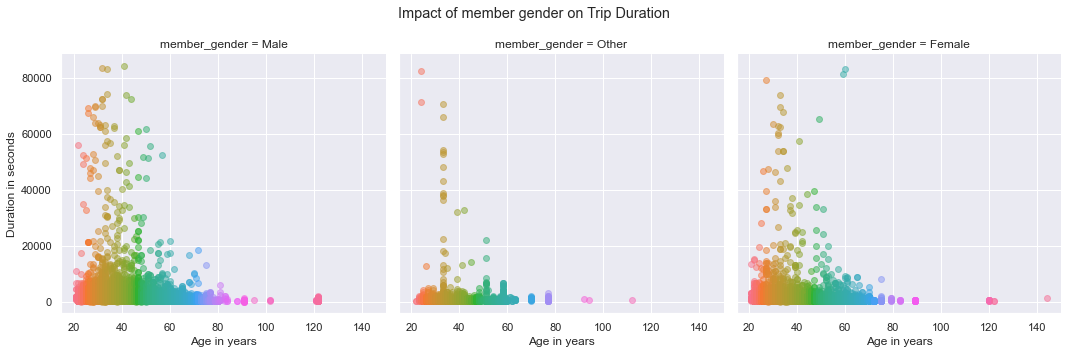

In [132]:
# Exploring the correlation between the gender and the age of the users
M_Gender = sb.FacetGrid(df, col="member_gender", hue="Age", col_wrap = 3, height = 5)
M_Gender.map(plt.scatter, 'Age', 'duration_sec', alpha=0.5)
M_Gender.fig.suptitle('Impact of member gender on Trip Duration')
M_Gender.set_xlabels('Age in years')
M_Gender.set_ylabels('Duration in seconds');
M_Gender.fig.subplots_adjust(top=0.85);

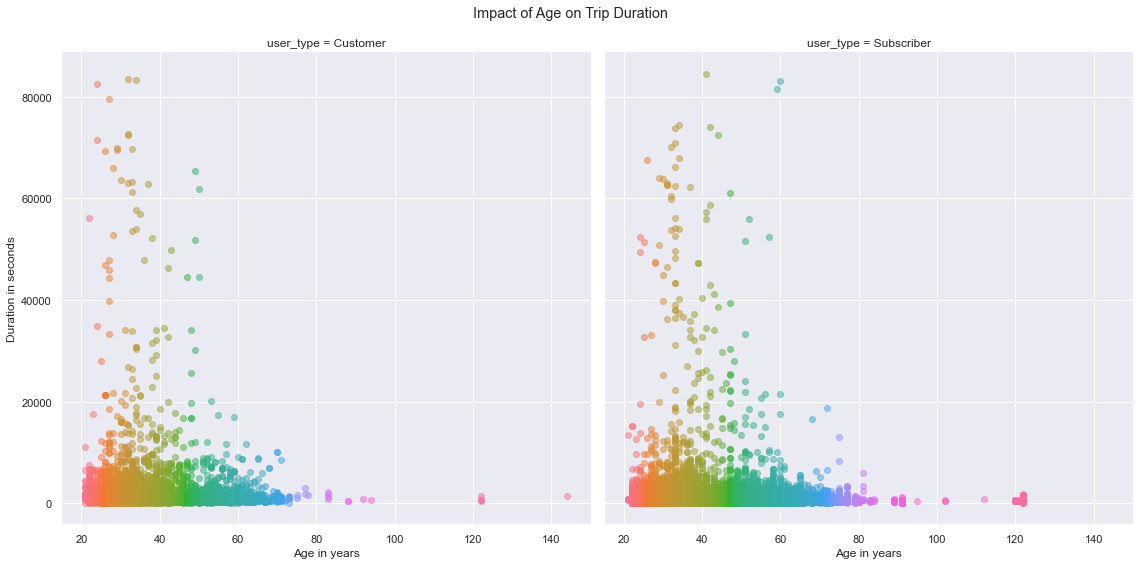

In [133]:
# Exploring the correlation between the user type and the age of the users
U_Type = sb.FacetGrid(df, col="user_type", hue="Age", col_wrap = 2, height = 8)
U_Type.map(plt.scatter, "Age", "duration_sec", alpha=0.5)
U_Type.fig.suptitle('Impact of Age on Trip Duration')
U_Type.set_xlabels('Age in years')
U_Type.set_ylabels('Duration in seconds');
U_Type.fig.subplots_adjust(top=0.9);

### Observed Relationships

> It is seen that even though the males have the highest trip duration, however, others have an almost constant long duration for people at the age of 60. (As seen in the gender and age correlation scatterplot)

### Interesting Features!
> It can be observed from the user type and their age distribution that both Subscriber and Customer are the same regarding the trends for age and trip duration

## Conclusions
> Users around the age of 30 use the bikes the most
> Majority are males
> User gender and age affects the trip duration to a great extent
